<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">XGBoost</h3>
    <h4 align="center"><a href="https://github.com/AliBinary">Ali Ghanbari</a></h5>
</div>

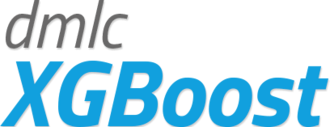

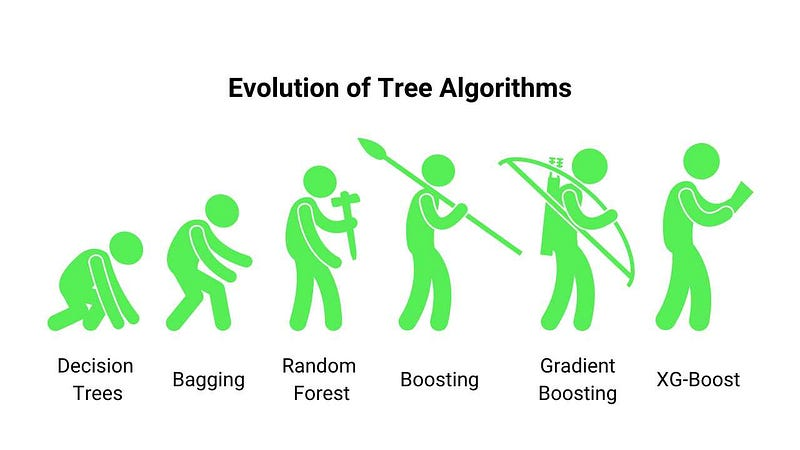

# Topics:

- [ ] What is XGBoost (Review)
- [ ] XGBoost in action (Regression)

## What is XGBoost?

eXtreme Gradient Boosting (XGBoost) is a scalable and improved version of the gradient boosting algorithm (terminology alert) designed for efficacy, computational speed and model performance. It is an open-source library and a part of the Distributed Machine Learning Community. XGBoost is a perfect blend of software and hardware capabilities designed to enhance existing boosting techniques with accuracy in the shortest amount of time. 

What makes XGBoost a go-to algorithm for winning Machine Learning and Kaggle competitions?

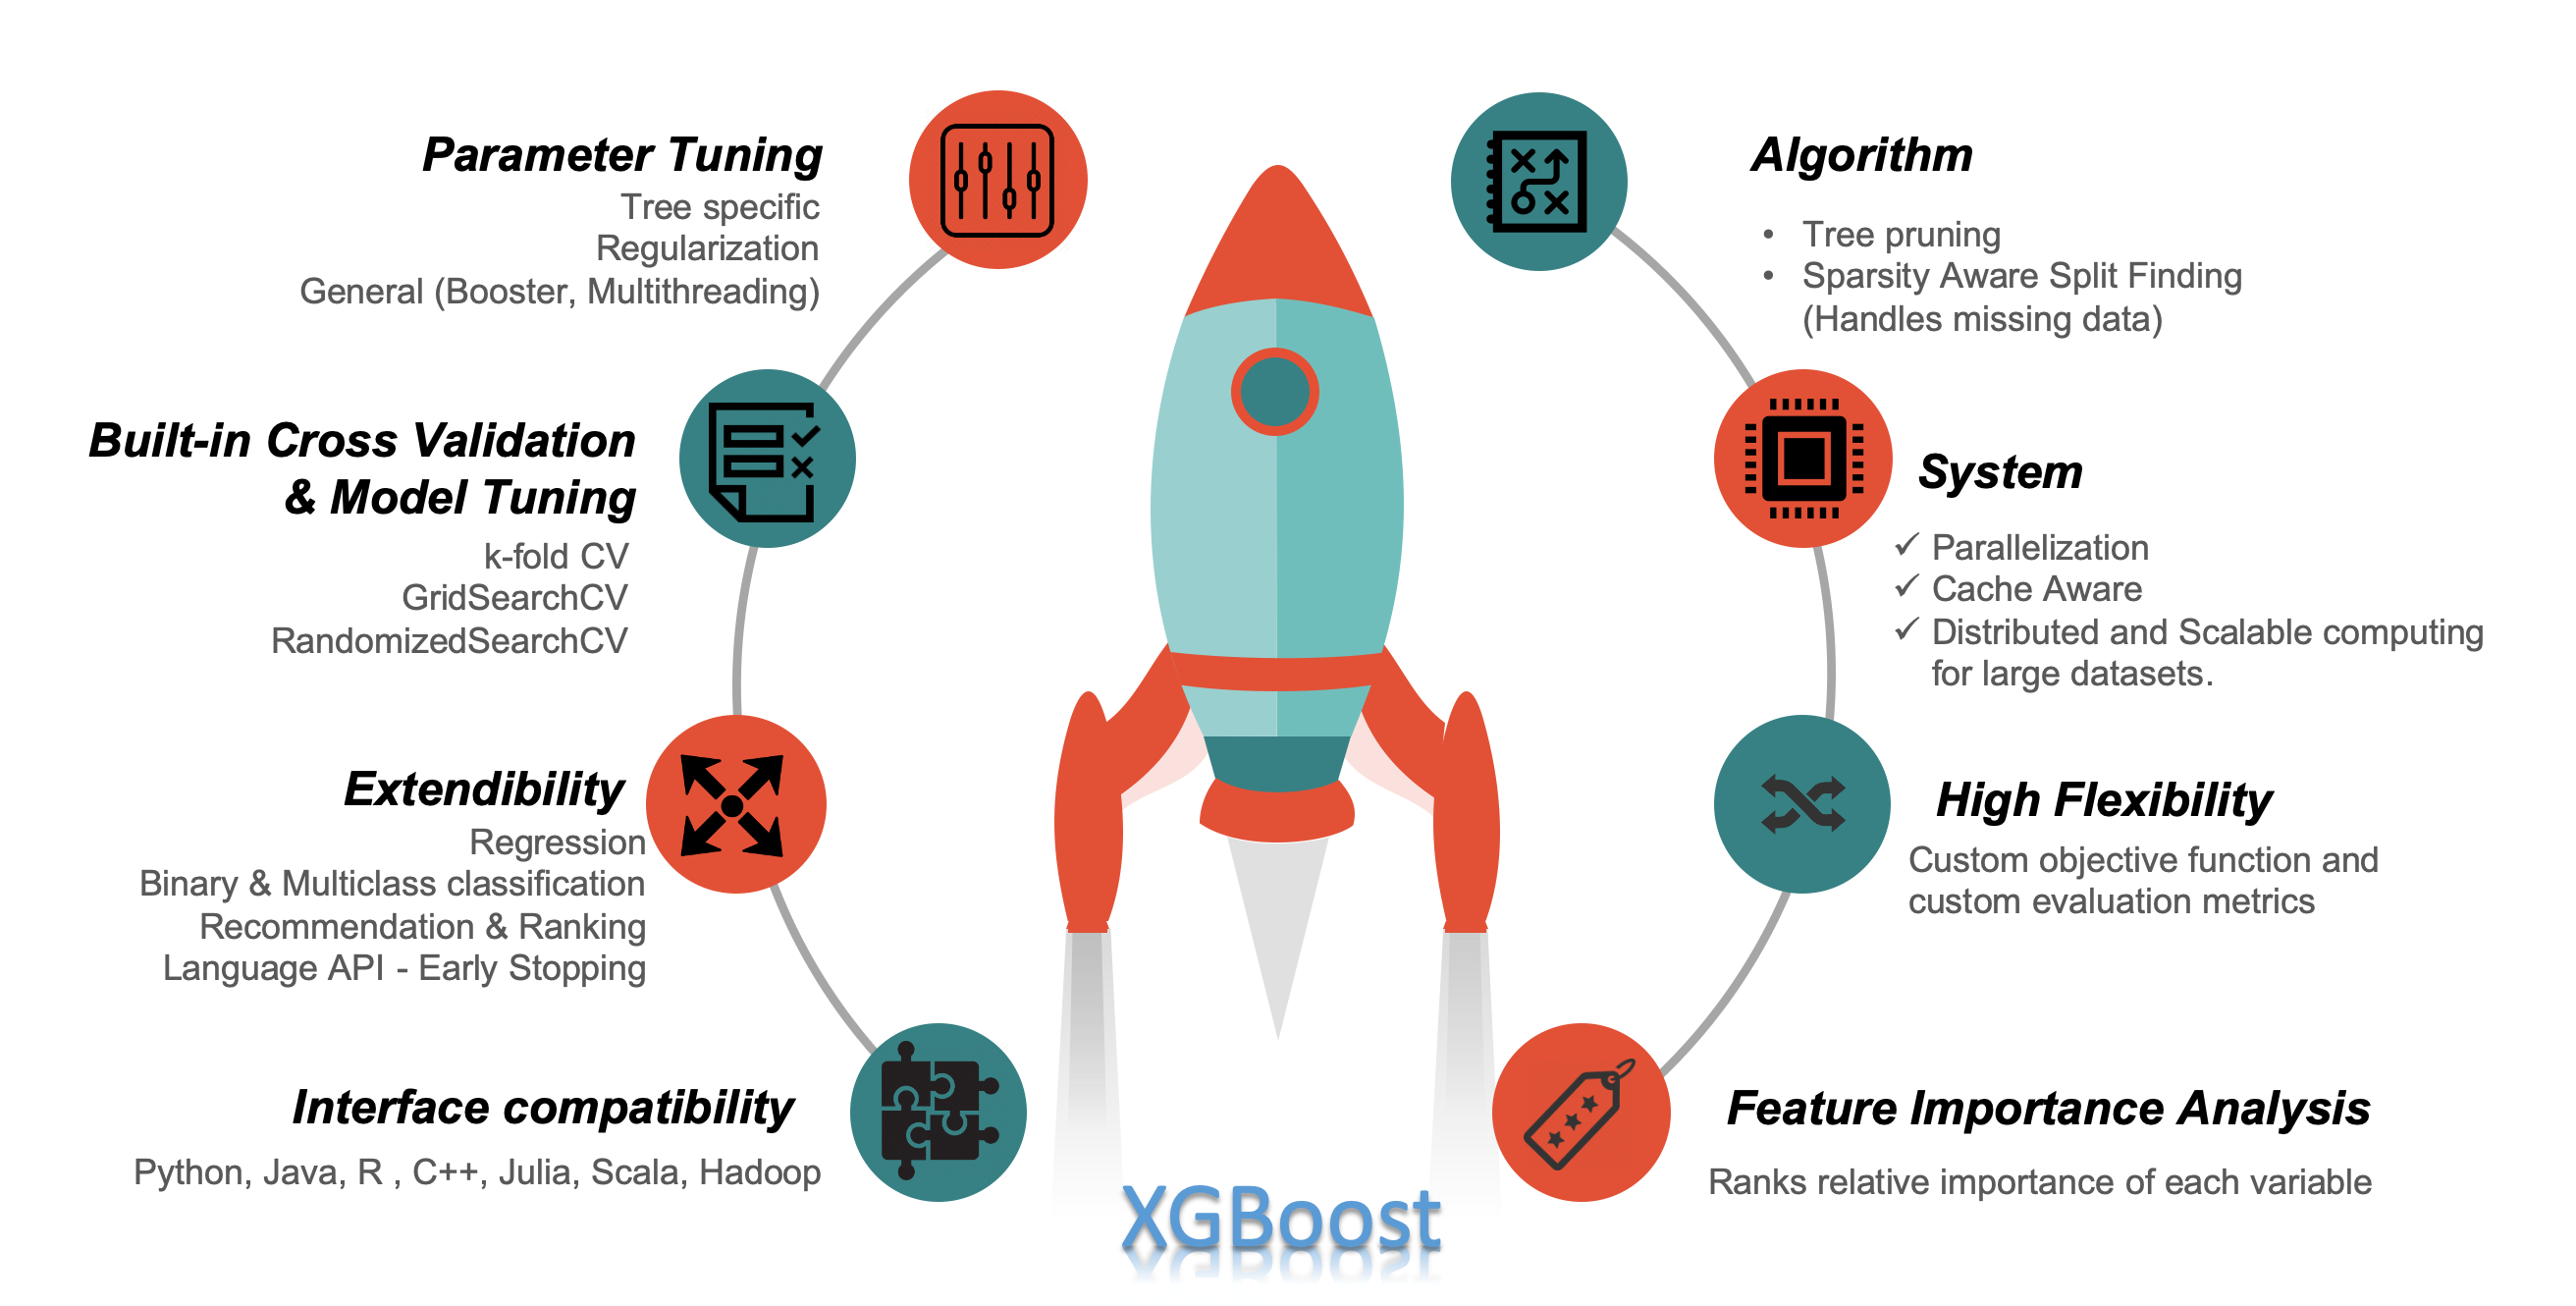

# XGBoost in Action (Regression)

## Importing the libraries

In [ ]:
# !pip install xgboost

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Load and Prepare Data

* Dataset We will be using a dataset that encapsulates the carbon dioxide emissions generated from burning coal for producing electricity power in the United States of America between 1973 and 2016. Using XGBoost, we will try to predict the carbon dioxide emissions in jupyter notebook for the next few years.

In [ ]:
#Read the dataset and print the top 5 elements of the dataset
data = pd.read_csv('CO2.csv')
data.head(5)

In [ ]:
data.info()

We use Pandas to import the CSV file. We notice that the dataframe contains a column 'YYYYMM' that needs to be separated into 'Year' and 'Month' column. In this step, we will also remove any null values that we may have in the dataframe. Finally, we will retrieve the last five elements of the dataframe to check if our code worked. And it did!

In [ ]:
data['Month'] = data.YYYYMM.astype(str).str[4:6].astype(float)
data['Year'] = data.YYYYMM.astype(str).str[0:4].astype(float)

In [ ]:
data.shape

In [ ]:
data.drop(['YYYYMM'], axis=1, inplace=True)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.tail(5)

In [ ]:
# check for data type
print(data.dtypes)

In [ ]:
data.isnull().sum()

In [ ]:
data.shape

In [ ]:
X = data.loc[:,['Month', 'Year']].values
y = data.loc[:,'Value'].values

In [ ]:
y

In [ ]:
data_dmatrix = xgb.DMatrix(X,label=y)

In [ ]:
data_dmatrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
xgb_reg = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=7,
    gamma=0,
)
xgb_reg.fit(X_train, y_train)

In [ ]:
# After training the model, we'll check the model training score.
scores = cross_val_score(xgb_reg, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

In [ ]:
xgb_reg.fit(X_train,y_train)

predictions = xgb_reg.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

In [ ]:
mae = mean_absolute_error(y_test, predictions)
print("MAE: %f" % (mae))

In [ ]:
r2 = r2_score(y_test, predictions)
print("R_Squared Score : %f" % (r2))

* As you can see, the these statistical metrics have reinstated our confidence about this model. RMSE ~ 4.5, R-Squared Score ~ 97.8%

Now let's visualize the original data set using the seaborn library.

In [ ]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='Year', y='Value', data=data)

In [ ]:
plt.figure(figsize=(10, 5), dpi=80)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="test")
plt.plot(x_ax, predictions, label="predicted")
plt.title("Carbon Dioxide Emissions - Test and Predicted data")
plt.legend()
plt.show()

Finally, the last piece of code will print the forecasted carbon dioxide emissions until 2025.

In [ ]:
plt.figure(figsize=(10, 5), dpi=80)
df=pd.DataFrame(predictions, columns=['pred']) 
df['date'] = pd.date_range(start='8/1/2016', periods=len(df), freq='ME')
sns.lineplot(x='date', y='pred', data=df)
plt.title("Carbon Dioxide Emissions - Forecast")
plt.show()